# **Data Preprocessing of Cell2Cell Dataset**

In [1]:
# https://www.kaggle.com/datasets/jpacse/datasets-for-churn-telecom

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
pd.set_option('display.max_columns', None)

data = pd.read_csv("dataset_cell2cell.csv")

## **Checking Dataset Properties**

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

In [3]:
print(data.head(25))

    CustomerID Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
0      3000002   Yes           24.00           219.0                  22.0   
1      3000010   Yes           16.99            10.0                  17.0   
2      3000014    No           38.00             8.0                  38.0   
3      3000022    No           82.28          1312.0                  75.0   
4      3000026   Yes           17.14             0.0                  17.0   
5      3000030    No           38.05           682.0                  52.0   
6      3000038    No           31.66            26.0                  30.0   
7      3000042    No           62.13            98.0                  66.0   
8      3000046    No           35.30            24.0                  35.0   
9      3000050    No           81.00          1056.0                  75.0   
10     3000054    No           25.23             2.0                  25.0   
11     3000058    No          212.51          1972.0            

In [4]:
data.isnull().sum()

CustomerID                     0
Churn                          0
MonthlyRevenue               156
MonthlyMinutes               156
TotalRecurringCharge         156
DirectorAssistedCalls        156
OverageMinutes               156
RoamingCalls                 156
PercChangeMinutes            367
PercChangeRevenues           367
DroppedCalls                   0
BlockedCalls                   0
UnansweredCalls                0
CustomerCareCalls              0
ThreewayCalls                  0
ReceivedCalls                  0
OutboundCalls                  0
InboundCalls                   0
PeakCallsInOut                 0
OffPeakCallsInOut              0
DroppedBlockedCalls            0
CallForwardingCalls            0
CallWaitingCalls               0
MonthsInService                0
UniqueSubs                     0
ActiveSubs                     0
ServiceArea                   24
Handsets                       1
HandsetModels                  1
CurrentEquipmentDays           1
AgeHH1    

## **Identifying Type of Features**

In [5]:
numericalData = [data.select_dtypes(include = ['float64']).columns,
                 data.select_dtypes(include = ['int64']).columns]
print(f"\nNumerical Features (float):\n{numericalData[0]}")
print(f"\nNumerical Features (int):\n{numericalData[1]}")

categoricalData = data.select_dtypes(include = ['object']).columns
print(f"\nCategorical Features:\n{categoricalData}")


Numerical Features (float):
Index(['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
       'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls',
       'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls',
       'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut',
       'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls',
       'CallWaitingCalls', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays',
       'AgeHH1', 'AgeHH2'],
      dtype='object')

Numerical Features (int):
Index(['CustomerID', 'MonthsInService', 'UniqueSubs', 'ActiveSubs',
       'RetentionCalls', 'RetentionOffersAccepted',
       'ReferralsMadeBySubscriber', 'IncomeGroup',
       'AdjustmentsToCreditRating'],
      dtype='object')

Categorical Features:
Index(['Churn', 'ServiceArea', 'ChildrenInHH', 'HandsetRefurbished',
       'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeowners

## **Handling Missing Data**

In [6]:
# Drop any entries with missing value for certain columns

columns = ['Handsets', 'HandsetModels', 'CurrentEquipmentDays'] 
data = data.dropna(subset=columns)

# Drop unnecessary columns

data = data.drop(columns=['CustomerID'])

In [7]:
# Fill missing values with the mean of the column

columns = ['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls',
           'OverageMinutes', 'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues'] 

for i in range(len(columns)):
    data[columns[i]].fillna(data[columns[i]].mean(), inplace=True)

In [8]:
# Fill missing values with string 'UNKNOWN'

data['ServiceArea'] = data['ServiceArea'].fillna("UNKNOWN")

In [9]:
# Fill missing values with 0

data['AgeHH1'] = data['AgeHH1'].fillna(0)
data['AgeHH2'] = data['AgeHH2'].fillna(0)

## **Modifying the Dataset**

In [10]:
# Changing credit rating dtype from object to int, scale 1 to 5

credRate = {'1-Highest' : 1, '2-High' : 2, '3-Good' : 3, '4-Medium' : 4,
            '5-Low' : 5, '6-VeryLow' : 6, '7-Lowest' : 7}

data['CreditRating'] = data['CreditRating'].map(credRate)

In [11]:
# Label Encoding for columns with dtype object

for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = LabelEncoder().fit_transform(data[column].astype(str)).astype('int64')

## **Dataset After Preprocessed**

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51046 entries, 0 to 51046
Data columns (total 57 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      51046 non-null  int64  
 1   MonthlyRevenue             51046 non-null  float64
 2   MonthlyMinutes             51046 non-null  float64
 3   TotalRecurringCharge       51046 non-null  float64
 4   DirectorAssistedCalls      51046 non-null  float64
 5   OverageMinutes             51046 non-null  float64
 6   RoamingCalls               51046 non-null  float64
 7   PercChangeMinutes          51046 non-null  float64
 8   PercChangeRevenues         51046 non-null  float64
 9   DroppedCalls               51046 non-null  float64
 10  BlockedCalls               51046 non-null  float64
 11  UnansweredCalls            51046 non-null  float64
 12  CustomerCareCalls          51046 non-null  float64
 13  ThreewayCalls              51046 non-null  flo

In [13]:
print(data.head(25))

    Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
0       1           24.00           219.0                  22.0   
1       1           16.99            10.0                  17.0   
2       0           38.00             8.0                  38.0   
3       0           82.28          1312.0                  75.0   
4       1           17.14             0.0                  17.0   
5       0           38.05           682.0                  52.0   
6       0           31.66            26.0                  30.0   
7       0           62.13            98.0                  66.0   
8       0           35.30            24.0                  35.0   
9       0           81.00          1056.0                  75.0   
10      0           25.23             2.0                  25.0   
11      0          212.51          1972.0                  85.0   
12      0           42.56           270.0                  37.0   
13      0           63.02           440.0                  60.

In [14]:
data.isnull().sum()

Churn                        0
MonthlyRevenue               0
MonthlyMinutes               0
TotalRecurringCharge         0
DirectorAssistedCalls        0
OverageMinutes               0
RoamingCalls                 0
PercChangeMinutes            0
PercChangeRevenues           0
DroppedCalls                 0
BlockedCalls                 0
UnansweredCalls              0
CustomerCareCalls            0
ThreewayCalls                0
ReceivedCalls                0
OutboundCalls                0
InboundCalls                 0
PeakCallsInOut               0
OffPeakCallsInOut            0
DroppedBlockedCalls          0
CallForwardingCalls          0
CallWaitingCalls             0
MonthsInService              0
UniqueSubs                   0
ActiveSubs                   0
ServiceArea                  0
Handsets                     0
HandsetModels                0
CurrentEquipmentDays         0
AgeHH1                       0
AgeHH2                       0
ChildrenInHH                 0
HandsetR

## **Distribution of Churn VS. Non-Churn Customers**

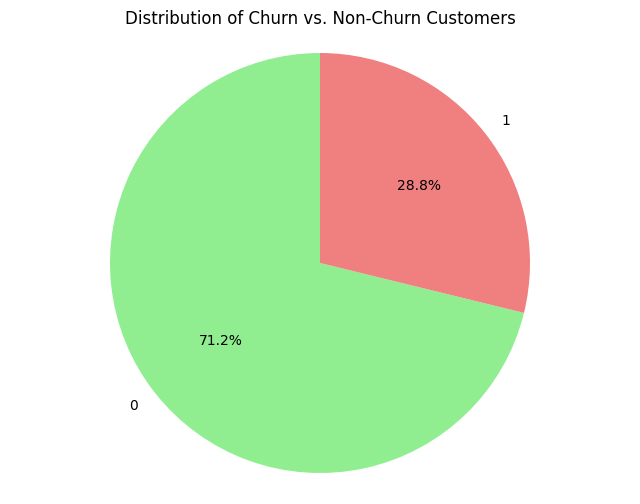

In [15]:
data_copy = data['Churn'].replace({'Yes': 'Churn', 'No': 'Non-Churn'})
churn_counts = data_copy.value_counts()
colors = ['lightgreen', 'lightcoral']

plt.figure(figsize=(8, 6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of Churn vs. Non-Churn Customers')

plt.axis('equal')
plt.show()

## **Exporting Preprocessed Data**

In [16]:
# Export dataset to a CSV file

data.to_csv('preprocessed_data_cell2cell.csv', index=False)
print("Data cell2cell has been exported to preprocessed_data_cell2cell.csv")

Data cell2cell has been exported to preprocessed_data_cell2cell.csv
